In [23]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [24]:
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [25]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res


X = standard_scale(X)

In [26]:
U, D, V = np.linalg.svd(X.T @ X)
U.shape, D.shape, V.shape

((4, 4), (4,), (4, 4))

In [27]:
D

array([437.77467248, 137.10457072,  22.01353134,   3.10722546])

In [28]:
eig_pairs = [(D[i], V[i]) for i in range(len(D))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.7746724797992, array([-0.52106591,  0.26934744, -0.5804131 , -0.56485654]))
(137.1045707202107, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.01353133569725, array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274]))
(3.1072254642928963, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [29]:
eig_sum = sum(D)
var_exp = [(i / eig_sum) * 100 for i in sorted(D, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[72.96244541329986, 22.850761786701774, 3.6689218892828745, 0.5178709107154826]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [30]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[-0.52106591 -0.37741762]
 [ 0.26934744 -0.92329566]
 [-0.5804131  -0.02449161]
 [-0.56485654 -0.06694199]]


In [31]:
Z = X.dot(W)
Z[:10]

array([[ 2.26470281, -0.4800266 ],
       [ 2.08096115,  0.67413356],
       [ 2.36422905,  0.34190802],
       [ 2.29938422,  0.59739451],
       [ 2.38984217, -0.64683538],
       [ 2.07563095, -1.48917752],
       [ 2.44402884, -0.0476442 ],
       [ 2.23284716, -0.22314807],
       [ 2.33464048,  1.11532768],
       [ 2.18432817,  0.46901356]])

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X)[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

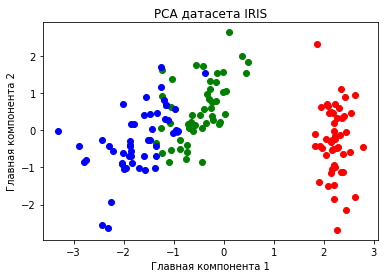

In [33]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()